Business Understanding:

When loading the original dataset, all of the observations and their features seemed to be populated with relevant information. With further inspection, there were a number of nuances that made it so the data looked complete but in reality was incomplete. In the first block of code, these nuances are addressed. Some features (tax/building class, gross/land square feet, and sale price) represented missing information by putting dashes and spaces in place of incomplete data. These needed to be represented as NaN's in order to have them show up as missing data points.

Further inspection of the data showed that there were a number of observations with features that should have a value greater than zero actually being equal to zero. For instance, while commercial/residential units may be equal to zero, total units should not. Zip code was another feature in particular that had a number of values equal to zero, but zip code should never be zero. For these features, the zeros needed to be converted to NaN's to have them show up as missing in the dataset. With these quality issues addressed, the dataset shows a fair amount of missing data. Some features such as tax/building class only had a minimal amount of missing features (<1%), but others like sale price and land/gross square feet were missing in a fair amount of observations(>25%). These issues could exist due to the data source(s) used to compile the dataset being incomplete themselves or just a poor recording of the data in the first place. Also, it's reasonable to assume that some buildings were sold without any land. Such buildings would need to be analyzed seperately from buildings with land.

Our first thought to handle the missing data was to use the KNNImputer to impute the continuous features in the dataset (land/gross square feet and sale price), but we kept getting a memory error. The next thought, with the original dataset being relatively large (84 times the required size of 1000 observations) was to simply eliminate those observations with missing data. Although another impute type could have been used (SimpleImpute for example) they did not seem like they would accurately fill in missing numeric values. For this reason, elimination seemed the best route to take for cleaning the dataset. With the observations containing missing features removed, the dataset still contained 30 times the required amount of observations leading us to believe that prediction would not be greatly affected by simply using elimination to deal with the missing data. Consequently, we removed roughy 60% of the observations. As a result, we lost a few of the unique instances of features like neighborhood and building/tax class, but retained >90% of the unique values (seen from .describe(include = "all) above with the original dataset and below with the cleaned dataset), so elimination seems fair.

In [6]:
#loading NYC Property Sales Data Set
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\qmorr\Documents\GitHub\CSE7324\Lab1\nyc-rolling-sales.csv')


#https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas
#used to remove things and replace with NaN

#Remove dashes, spaces, and zeros to show missing data

df.loc[df['SALE PRICE'].str.contains('-'),'SALE PRICE'] = float(np.NaN)
df.loc[df['LAND SQUARE FEET'].str.contains('-'),'LAND SQUARE FEET'] = float(np.NaN)
df.loc[df['GROSS SQUARE FEET'].str.contains('-'),'GROSS SQUARE FEET'] = float(np.NaN)
df.loc[df['TAX CLASS AT PRESENT'].str.contains(' '),'TAX CLASS AT PRESENT'] = float(np.NaN)
df.loc[df['BUILDING CLASS AT PRESENT'].str.contains(' '),'BUILDING CLASS AT PRESENT'] = float(np.NaN)
df.loc[df['TOTAL UNITS'] == 0,'TOTAL UNITS'] = float(np.NaN)
df.loc[df['YEAR BUILT'] == 0,'YEAR BUILT'] = float(np.NaN)
df.loc[df['SALE PRICE'] == '0','SALE PRICE'] = float(np.NaN)
df.loc[df['GROSS SQUARE FEET'] == 0,'GROSS SQUARE FEET'] = float(np.NaN)
df.loc[df['LAND SQUARE FEET'] == 0,'LAND SQUARE FEET'] = float(np.NaN)



#change strings into numeric values 

cols = ['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET']
for col in cols:
    df[col] = pd.to_numeric(df[col])
    
#delete uneccesary features

for col in ['EASE-MENT','SALE DATE','LOT','APARTMENT NUMBER','ADDRESS']:
    if col in df:
        del df[col] 
df.info()                   
print('---------------------------------------------------')
df.describe(include = "all")    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              83810 non-null object
BLOCK                             84548 non-null int64
BUILDING CLASS AT PRESENT         83810 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       64786 non-null float64
LAND SQUARE FEET                  58296 non-null float64
GROSS SQUARE FEET                 56936 non-null float64
YEAR BUILT                        77578 non-null float64
TAX CLASS AT TIME OF SALE         84548 non-null int64
BUILDING CLASS AT TIME OF SALE    84548 non-null objec

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548,84548,83810,84548.000000,83810,84548.000000,84548.000000,84548.000000,64786.000000,5.829600e+04,5.693600e+04,77578.000000,84548.000000,84548,5.975900e+04
unique,NaN,NaN,254,47,10,NaN,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166,NaN
top,NaN,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,D4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN
freq,NaN,NaN,3068,18235,38633,NaN,12663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12989,NaN
mean,10344.359878,2.998758,NaN,NaN,NaN,4237.218976,NaN,10731.991614,2.025264,0.193559,2.935264,3.941676e+03,4.045707e+03,1950.084805,1.657485,NaN,1.494927e+06
std,7151.779436,1.289790,NaN,NaN,NaN,3568.263407,NaN,1290.879147,16.721037,8.713183,21.627457,4.198397e+04,3.503249e+04,34.330251,0.819341,NaN,1.232953e+07
min,4.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1111.000000,1.000000,NaN,1.000000e+00
25%,4231.000000,2.000000,NaN,NaN,NaN,1322.750000,NaN,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1925.000000,1.000000,NaN,3.700000e+05
50%,8942.000000,3.000000,NaN,NaN,NaN,3311.000000,NaN,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1945.000000,2.000000,NaN,6.255000e+05
75%,15987.250000,4.000000,NaN,NaN,NaN,6281.000000,NaN,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1970.000000,2.000000,NaN,1.070000e+06


Data Understanding - Loading Dataset:
    
When loading the dataset the sale price, land square feet and gross square feet are all input as strings. These needed to be changed into floats (using  as they should be represented as continuous values for the most accurate prediction. The feature "neighborhood" is purely a string and is represented correcly as an object when retrieving the dataset. Some of the variables that describe class (tax class and building class, at both present and time of sale) should are represented correctly as objects (strings). These values are alphanumeric in nature, using both numbers and letters to describe classes, so they should remain represented as strings. Features like borough, block, zip code, and number of commercial/residential units are all best represented as discrete values, as there should not be decimal values in these variables. The dataset correctly lists these features as ints to show that they are discrete. 

Unnamed: 0                         0.000000
BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.872877
BLOCK                              0.000000
BUILDING CLASS AT PRESENT          0.872877
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                       23.373705
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         8.243838
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        29.319440
dtype: float64


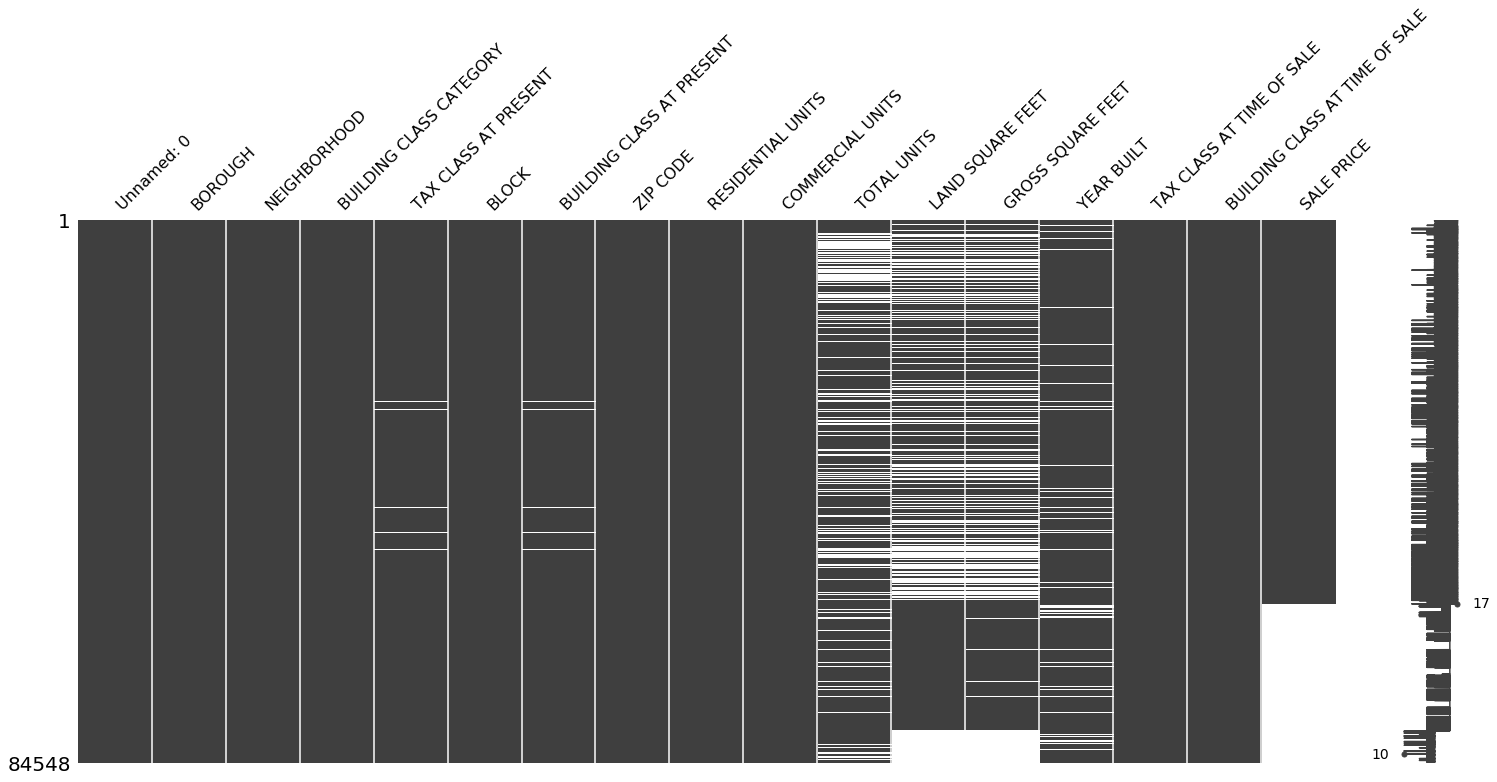

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import missingno as mn
#warnings.simplefilter('ignore', DepreciationWarning)
%matplotlib inline


#getting a visual idea of missing values
mn.matrix(df.sort_values(by=["SALE PRICE","LAND SQUARE FEET","GROSS SQUARE FEET"]))

#getting a numerical idea of missing values (as a percent)
print(df.isnull().sum()/len(df)*100)

Data Understanding - Verifying Data Quality:

When loading the original dataset, all of the observations and their features seemed to be populated with relevant information. With further inspection, there were a number of nuances that made it so the data looked complete but in reality was incomplete. In the first block of code, these nuances are addressed. Some features (tax/building class, gross/land square feet, and sale price) represented missing information by putting dashes and spaces in place of incomplete data. These needed to be represented as NaN's in order to have them show up as missing data points. Further inspection of the data showed that there were a number of observations with features that should have a value greater than zero actually being equal to zero. For instance, while commercial/residential units may be equal to zero, total units should not. Zip code was another feature in particular that had a number of values equal to zero, but zip code should never be zero. For these features, the zeros needed to be converted to NaN's to have them show up as missing in the dataset. With these quality issues addressed, the dataset shows a fair amount of missing data. Some features such as tax/building class only had a minimal amount of missing features (<1%), but others like sale price and land/gross square feet were missing in a fair amount of observations(>25%). These issues could exist due to the data source(s) used to compile the dataset being incomplete themselves or just a poor recording of the data in the first place. Our first thought to handle the missing data was to use the KNNImputer to impute the continuous features in the dataset (land/gross square feet and sale price), but we kept getting a memory error. The next thought, with the original dataset being relatively large (84 times the required size of 1000 observations) was to simply eliminate those observations with missing data. Although another impute type could have been used (SimpleImpute for example) they did not seem like they would accurately fill in missing numeric values. For this reason, elimination seemed the best route to take for cleaning the dataset. With the observations containing missing features removed, the dataset still contained 30 times the required amount of observations leading us to believe that prediction would not be greatly affected by simply using elimination to deal with the missing data. We lose a few of the unique instances of features like neighborhood and building/tax class, but retain >90% of the unique values (seen from .describe(include = "all) above with the original dataset and below with the cleaned dataset), so elimination seems fair.

In [8]:
#https://machinelearningmastery.com/handle-missing-data-python/
#used to drop rows with missing data

import copy

df_removed = copy.deepcopy(df)
df_removed.dropna(inplace=True)
print('Shape of original DataFrame:',df.shape)
print('Shape of clean DataFrame:',df_removed.shape)
df_removed.describe(include = "all")

Shape of original DataFrame: (84548, 17)
Shape of clean DataFrame: (32721, 17)


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
count,32721.000000,32721.000000,32721,32721,32721,32721.000000,32721,32721.000000,32721.000000,32721.000000,32721.000000,3.272100e+04,3.272100e+04,32721.000000,32721.000000,32721,3.272100e+04
unique,NaN,NaN,250,43,9,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,NaN
top,NaN,NaN,BEDFORD STUYVESANT,01 ONE FAMILY DWELLINGS,1,NaN,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1,NaN
freq,NaN,NaN,816,12939,25478,NaN,4838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4834,NaN
mean,10514.310198,3.472541,NaN,NaN,NaN,5264.438281,NaN,11012.229211,2.835427,0.296323,3.136885,3.786255e+03,4.124620e+03,1946.032517,1.311237,NaN,1.586114e+06
std,7720.652408,0.984625,NaN,NaN,NaN,3761.398745,NaN,503.822971,18.977352,13.271130,23.287291,3.364749e+04,3.232192e+04,35.138936,0.721279,NaN,1.610606e+07
min,4.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1800.000000,1.000000,NaN,1.000000e+00
25%,3856.000000,3.000000,NaN,NaN,NaN,2148.000000,NaN,10466.000000,1.000000,0.000000,1.000000,1.850000e+03,1.224000e+03,1920.000000,1.000000,NaN,4.250000e+05
50%,7869.000000,3.000000,NaN,NaN,NaN,4683.000000,NaN,11220.000000,1.000000,0.000000,1.000000,2.464000e+03,1.736000e+03,1932.000000,1.000000,NaN,6.364060e+05
75%,17391.000000,4.000000,NaN,NaN,NaN,7465.000000,NaN,11367.000000,2.000000,0.000000,2.000000,3.720000e+03,2.520000e+03,1965.000000,1.000000,NaN,9.800000e+05


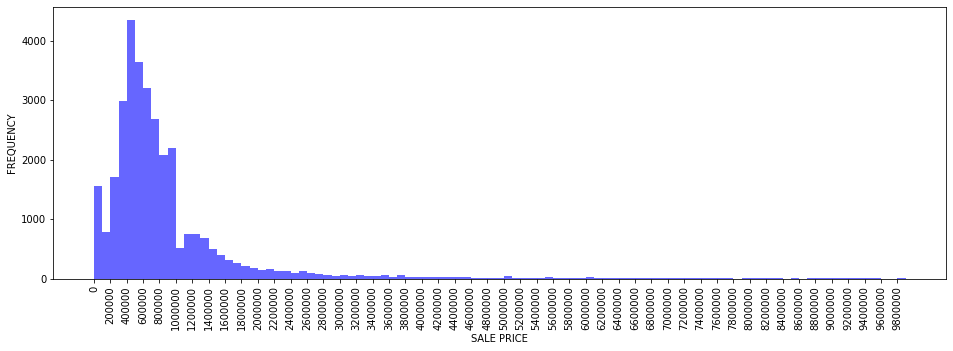

---------------------------------------------------
Average Sale Price: 1586113.7671831546


In [9]:
#https://stackoverflow.com/questions/17109608/change-figure-size-and-figure-format-in-matplotlib/17109830
#used to make histogram wider
plt.rcParams["figure.figsize"] = [16,5]

#https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb
#used to help plot

plt.hist(df_removed['SALE PRICE'], bins = range(0,10**7,100000), facecolor = 'blue',alpha = 0.6)


#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
#used to add ticks to histogram
plt.xticks(np.arange(0,10**7,200000))

#https://www.geeksforgeeks.org/python-matplotlib-pyplot-ticks/
#used to rotate ticks

plt.tick_params(axis = 'x', rotation = 90)
plt.xlabel('SALE PRICE')
plt.ylabel('FREQUENCY')
plt.show()
print('---------------------------------------------------')
print('Average Sale Price:',df_removed['SALE PRICE'].mean())

Data Visualization - Sale Price Histogram:

The histogram of sale price begins to show us how the sale prices are distributed in the NYC Property Sales dataset. It is right skewed which tells us that while there are many data points with a sale price less than the reported mean, the observations with a high sale price drive this average up. Most properties were sold for less than $800,000 but expensive properties make it so the average price for properties sold in NYC in 2017 is nearly twice this value (about $1.5M). This histogram also gives us an idea of where outliers may exist or further explanation of data points may be needed. In the description of the sale price data above, the maximum value is $2B which seems quite high. One reason for this value could be the sale of an entire commercial building while the lower, more average, values observed could be of residential units. 

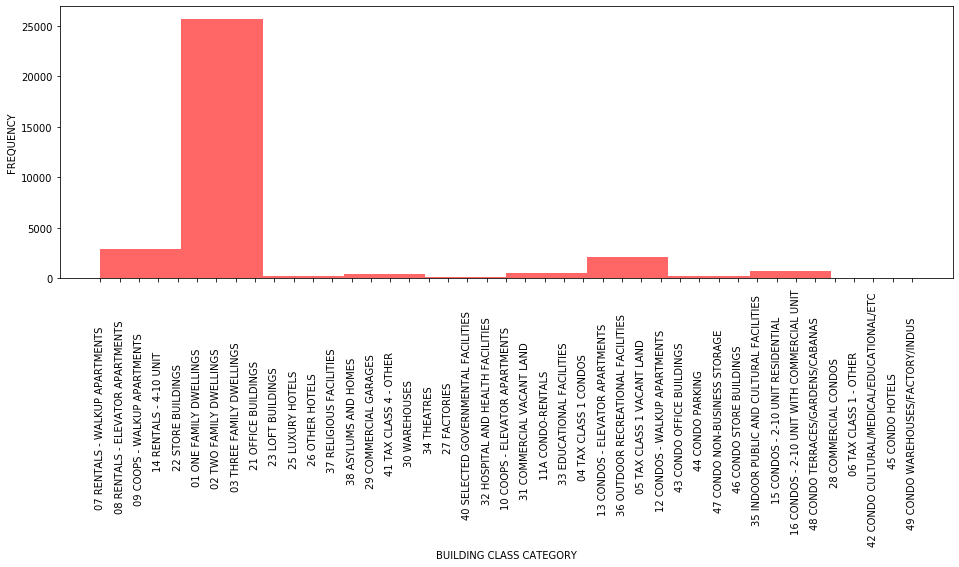

In [10]:
#https://stackoverflow.com/questions/17109608/change-figure-size-and-figure-format-in-matplotlib/17109830
#used to make histogram wider
plt.rcParams["figure.figsize"] = [16,5]

#https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb
#used to help plot
plt.hist(df_removed['BUILDING CLASS CATEGORY'], facecolor = 'red', alpha = 0.6)

#https://www.geeksforgeeks.org/python-matplotlib-pyplot-ticks/
#used to rotate ticks
plt.tick_params(axis = 'x', rotation = 90)
plt.xlabel('BUILDING CLASS CATEGORY')
plt.ylabel('FREQUENCY')

plt.show()

Data Visualization - Building Class Category Histogram:

The histogram for building class category appears sparse, but could show reason for the high values seen in the tail of the Sale Price Histogram. Most of the data is falling in the bins represented by family dwellings (those that hold one, two, and three families) and office buildings. The sparsity of the historgram shows that while all of these building types may by represented in the data, only a subset of those types might be necessary in order to make predictions about price. From the inverse perspective, this means that a lot of other features may be needed to have prediction be accurate if we are trying to find out what kind of sale prices map to different building types.  

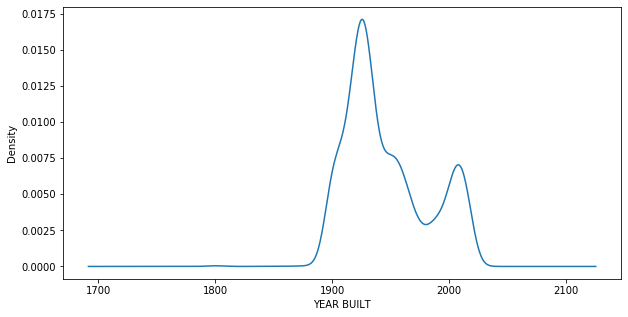

In [11]:
#https://stackoverflow.com/questions/17109608/change-figure-size-and-figure-format-in-matplotlib/17109830
#used to make histogram wider
plt.rcParams["figure.figsize"] = [10,5]

#https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb
#used to help plot
df_removed['YEAR BUILT'].plot.kde(bw_method=0.2)
plt.xlabel('YEAR BUILT')


plt.show()

Data Visualization - Year Built KDE:

All of the properties in the data set were sold in 2017, but getting an idea of when those properties were built could provide futher insight for predicting other features such as sale price and location (zip code, neighborhood). Most of the properties were built in the early to mid 1900s. These could be considered "historic" or "older" properties that we can group together in later analysis. There is another peak in the graph during the early 2000s that can be considered "new" or "recent" properties. Being able to split the observations up into groups based on the year they were built could highlight different properties that were popular in one time period that were not in another. 

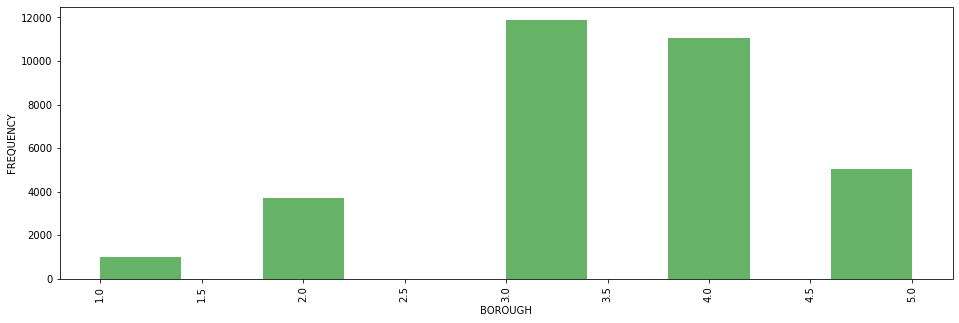

In [12]:
#https://stackoverflow.com/questions/17109608/change-figure-size-and-figure-format-in-matplotlib/17109830
#used to make histogram wider
plt.rcParams["figure.figsize"] = [16,5]

plt.hist(df_removed['BOROUGH'],align = 'mid',facecolor = 'green', alpha = 0.6)
#plt.xticks(np.arange(0,2200,50))
plt.tick_params(axis = 'x', rotation = 90)
plt.xlabel('BOROUGH')
plt.ylabel('FREQUENCY')

plt.show()



Data Visualization - Boroughs Histogram:

When looking at this histogram for the distribution of properties in different boroughs in the dataset there is nothing obvious to conclude off the bat. We can see that most of the properties observed come from boroughs 3 and 4, but the data set does not indicate which neighborhood or zip code they come from. Something that might be useful to give a better idea of where these boroughs are located would be to find the most frequently seen neighborhoods and zip codes in the data set. The most neighborhoods and zip codes with the highest frequency of sightings would likely be in boroughs 3 and 4 and further research could show what the names of the boroughs the neighborhoods and zip codes belong to.

Text(0, 0.5, 'Sale Price')

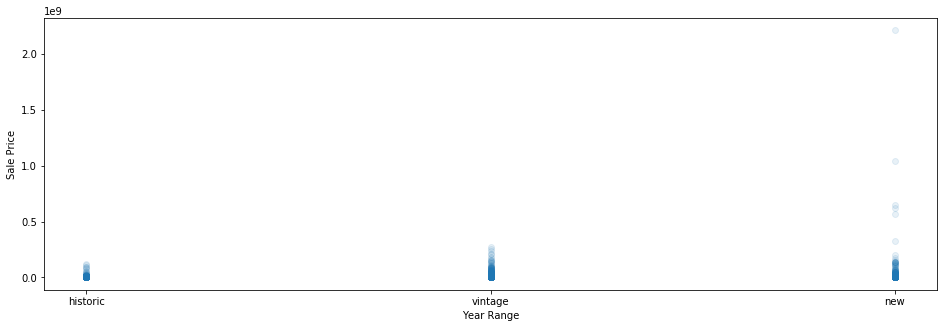

In [13]:
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb
#used to help plot and cut DataFrame
df_removed['Year Range'] = pd.cut(df_removed['YEAR BUILT'],[0,1900,1950,2017],labels=['historic','vintage','new'])

plt.scatter(df_removed['Year Range'],df_removed['SALE PRICE'],alpha = 0.1)
plt.xlabel('Year Range')
plt.ylabel('Sale Price')

Data Visualization - Question 1:

"How does the year a property was built affect its 2017 sale price?"

Creating a scatter plot of years built versus the sale price initially creates a visual with most of the data points falling very close to the x-axis (which makes sense from our sale price histogram above), but does not clearly show how sale price changes according to the year the property was built. By cutting the year build feature into 3 distinguishable ranges, the distribution of price according to those year ranges is made much clearer. Properties that were built before 1900 (historic) have values of sale price as well as the smallest range that those values fall between. Vintage properties (those built between 1900 and 1950) also have low sale prices, but the range of sale prices is larger. This would indicate that what we call a vintage building has a greater chance of being sold at a price higher than that of a historic building. The last category of building year is "new" which accounts for properties that were built between 1950 and the final year of data collection, 2017. From the plot, we can clearly see that the most expensive properties are those that are built most recently. This could be a key indicator that a high sale price is almost guaranteed to be a property that was built after 1950.  

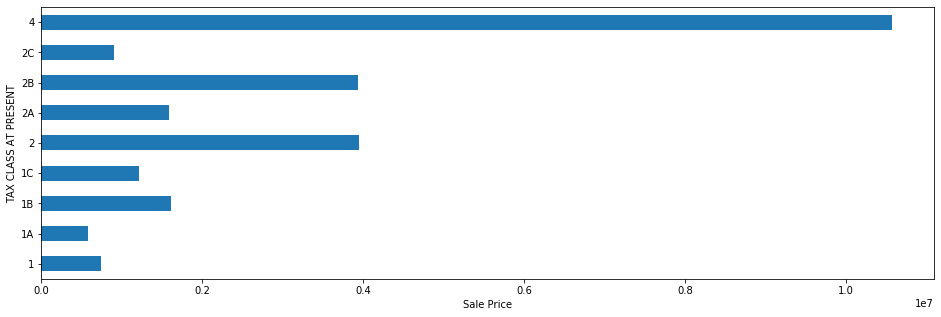

In [14]:
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb
#used to help plot and groupby

df_group_by_tcap = df_removed.groupby(by = ['TAX CLASS AT PRESENT'])
price_by_tcap = df_group_by_tcap['SALE PRICE'].mean()
bcc_plot = price_by_tcap.plot(kind='barh')
plt.xlabel('Sale Price')
plt.show()

Data Visualization - Question 2:

"What kind of prices different tax classes are willing to pay for/can afford?"

Realtors may want to use the tax information of clients they are selling to to figure out what kind of prices they can charge for a property. To visualize this scenario, we have made a bar graph of the average sale price by each tax class. It is made clear from this visualization that if someone is looking to sell a very expensive property, clients that fall under tax class 4 are most likely to pay the listed sale price as they have the highest average. Tax classes 2 and 2B seem to be the clients most likely to pay for properties that are of mid-range price and the other tax classes average sale prices are all fairly low. This representation of sale price by tax class would be useful in predicting sale price of a property because by seeing what tax class a client falls under, the price they are willing to pay/can afford for a property may be more easily predicted leading to a narrowing of properties they should be showed, shorter negotiation period, and faster sale. 

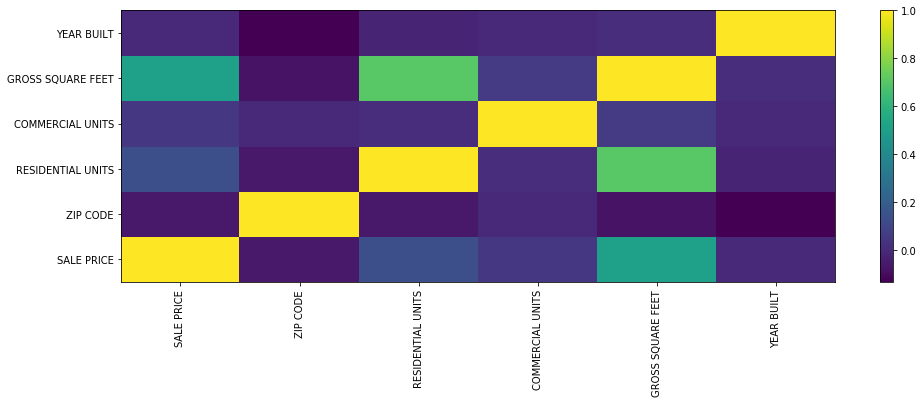

In [15]:
#https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb
#used to help plot

corr_vars = ['SALE PRICE','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','GROSS SQUARE FEET','YEAR BUILT']
plt.pcolor(df_removed[corr_vars].corr())
plt.yticks(np.arange(0.5, len(corr_vars), 1), corr_vars)
plt.xticks(np.arange(0.5, len(corr_vars), 1), corr_vars, rotation = 90)
plt.colorbar()
plt.show()

Data Visualization - Question 3:

"What is the best numerical indicator of sale price?"

To find the best numerical indicator of sale price, a correlation matrix that acts as a heat map is best. From the correlation matrix above, it can be seen that gross square feet, the amount of space a property has, would be the most indicative of the sale price. Intuitively, a property with more space would be more expensive which would represent a positive correlation. This intuition is verified by the correlation matrix with the square for correlation between gross square feet and sale price mapping to the color representing positive correlation (dark green, about 0.4 or 0.5). Something interesting in this visualization aside from answering our question is that the number of residential units is highly positively correlated with gross square feet. This makes sense because the larger the footprint of a building, the more residential units it would be able to contain.

In [16]:

#allocate space for number of unique neighborhood instances and their size
l=[0]*2*len(df['NEIGHBORHOOD'].unique())



df_grouped = df.groupby(by='NEIGHBORHOOD')
counter=0
#Put neighborhood instances and their size in a list
for val,grp in df_grouped:
      
    l[2*counter]=val
    l[2*counter+1]=len(grp)
    counter=counter+1
    

#https://www.geeksforgeeks.org/python-program-to-find-n-largest-elements-from-a-list/
#slightly modified algorithm to find top neighborhoods
    
#run algorithm to determine 50 neighborhoods where houses were sold the most

final_list=[]
final_string=[]
sum=0
for i in range(0, 50):  
    max1 = 0
    k=0      
    for j in range(int(len(l)/2)):      
        if l[2*j+1] > max1: 
            max1 = l[2*j+1]; 
            maxstring=l[2*j]
    sum=sum+max1        
    l.remove(max1); 
    l.remove(maxstring)
    final_string.append(maxstring)
    final_list.append(max1) 


#Calculate percentage of how many houses the top 50 neighborhoods contain of the whole dataset.     
print('percentage of top', 50,'neighborhoods is', sum/df['NEIGHBORHOOD'].count()*100,'\n')

print(final_string)
print(final_list)

percentage of top 50 neighborhoods is 51.75876425225907 

['FLUSHING-NORTH', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)', 'UPPER WEST SIDE (59-79)', 'BEDFORD STUYVESANT', 'MIDTOWN EAST', 'BOROUGH PARK', 'ASTORIA', 'BAYSIDE', 'FOREST HILLS', 'SHEEPSHEAD BAY', 'UPPER WEST SIDE (79-96)', 'JACKSON HEIGHTS', 'EAST NEW YORK', 'FLUSHING-SOUTH', 'MIDTOWN WEST', 'HARLEM-CENTRAL', 'FLATBUSH-EAST', 'BAY RIDGE', 'CHELSEA', 'ELMHURST', 'CROWN HEIGHTS', 'CANARSIE', 'GREAT KILLS', 'BUSHWICK', 'RICHMOND HILL', 'REGO PARK', 'PARK SLOPE', 'GRAVESEND', 'TRIBECA', 'CORONA', 'RIVERDALE', 'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST', 'MURRAY HILL', 'ST. ALBANS', 'SUNSET PARK', 'SO. JAMAICA-BAISLEY PARK', 'QUEENS VILLAGE', 'NEW SPRINGVILLE', 'HOWARD BEACH', 'OZONE PARK', 'LONG ISLAND CITY', 'BENSONHURST', 'OCEAN PARKWAY-NORTH', 'SOUTH OZONE PARK', 'SPRINGFIELD GARDENS', 'FLATBUSH-CENTRAL', 'SOUTH JAMAICA', 'BRIGHTON BEACH']
[3068, 1736, 1590, 1439, 1436, 1418, 1245, 1216, 1150, 1069, 1013, 

The above code is an additional way to analyze features that contain many categories. Top 50 neighboorhoods with the largest numbers of houses sold were computed. After sum of the houses in these neighborhoods were computed, one can find what percentage of all houses is contained in these neighborhoods. 50 neighborhoods accounted for 50 percent of the data set. One could reuse the algorithm by creating a function and find n top categories, which can allow a better understanding of the dataset, eliminate less significant categories, etc. 